# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [3]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [26]:
dfcovid = pd.read_csv('data/New_York_State_Statewide_COVID-19_Testing__Archived__20240428.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

This section displays 5 rows from the COVID dataset by randomly sampling the data

In [31]:
randomrows = dfcovid.sample(5)
print(randomrows)

        Test Date        County  New Positives  \
84089  07/05/2020        Warren              3   
19665  12/04/2022    Livingston              5   
53053  09/03/2021     Schoharie             14   
19947  11/30/2022  Finger Lakes            209   
15833  01/26/2023        Ulster             28   

       Cumulative Number of Positives  Total Number of Tests Performed  \
84089                             272                              164   
19665                           13942                               96   
53053                            1926                              147   
19947                          292605                             4085   
15833                           42789                              228   

       Cumulative Number of Tests Performed Test % Positive Geography  
84089                                 10800           1.83%    COUNTY  
19665                                286869           4.30%    COUNTY  
53053                                 

This basically prints the column names and the data type that those columns hold

In [33]:
print(dfcovid.dtypes)

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
Test % Positive                         object
Geography                               object
dtype: object


For this, I calculated the number of unique instances in the geography column. In context, this is the type of sampling that specific rows shows, and it makes sense because county is the largest because there are just more counties.

In [34]:
geography_counts = dfcovid['Geography'].value_counts()
geography_counts

Geography
COUNTY       79236
REGION       12780
STATEWIDE     1278
Name: count, dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

Getting rid of Nan and blank values in the dataset

In [ ]:
dfcovid_cleaned = dfcovid.dropna()

Select only the relevent columns for data analysis (ie things like geography don't tell us much, other than it being cool, so to save space and keep it clean we get rid of columns like that)

In [ ]:
mungedcovid = dfcovid_cleaned[['Test Date', 'County', 'New Positives', 'Cumulative Number of Positives', 'Total Number of Tests Performed']]

Display the modified code (5 rows)

In [ ]:
mungedrows = mungedcovid.sample(5)
print(mungedrows)

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

Sorted rows by albany county, and average the number of new cases (ie the capital of new york, very interesting)

In [36]:
albanydata = dfcovid[dfcovid['County'] == 'Albany']
average_new_positives_albany = albanydata['New Positives'].mean()
average_new_positives_albany


63.15179968701096

sort the data by ascending number of new positives, add the number of new postives for and print the 1st 5 rows

In [41]:
sorted_dfcovid = dfcovid.sort_values(by='New Positives', ascending=False)
top_five_rows = sorted_dfcovid.head(5)
sum_top_five_new_positives = top_five_rows['New Positives'].sum()
print(sum_top_five_new_positives)
sorted_dfcovid.head(5)


421681


,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
43852,01/07/2022,STATEWIDE,90132,4056827,425782,91136197,21.17%,STATEWIDE
44363,12/31/2021,STATEWIDE,85476,3555040,384365,88871159,22.24%,STATEWIDE
43998,01/05/2022,STATEWIDE,84202,3884601,377565,90333255,22.30%,STATEWIDE
43925,01/06/2022,STATEWIDE,82094,3966695,377160,90710415,21.77%,STATEWIDE
43779,01/08/2022,STATEWIDE,79777,4136604,401466,91537663,19.87%,STATEWIDE


find the number of times there are no new positives

In [39]:
no_positives_count = (dfcovid['New Positives'] == 0).sum()
no_positives_count


9684

add the number of unique values for "Test Date", essentially telling how many days this dataset displays

In [43]:
unique_test_dates = dfcovid['Test Date'].nunique()
print(unique_test_dates)

1278


the largest value in the 'Cumulative Number of Positives' column, essentially telling us the max number of positives in the state

In [45]:
max_cumulative_positives = dfcovid['Cumulative Number of Positives'].max()
print(max_cumulative_positives)


6746468


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

This line chart tracks the New Positives over the the date to visualize the trend of COVID-19 cases over time

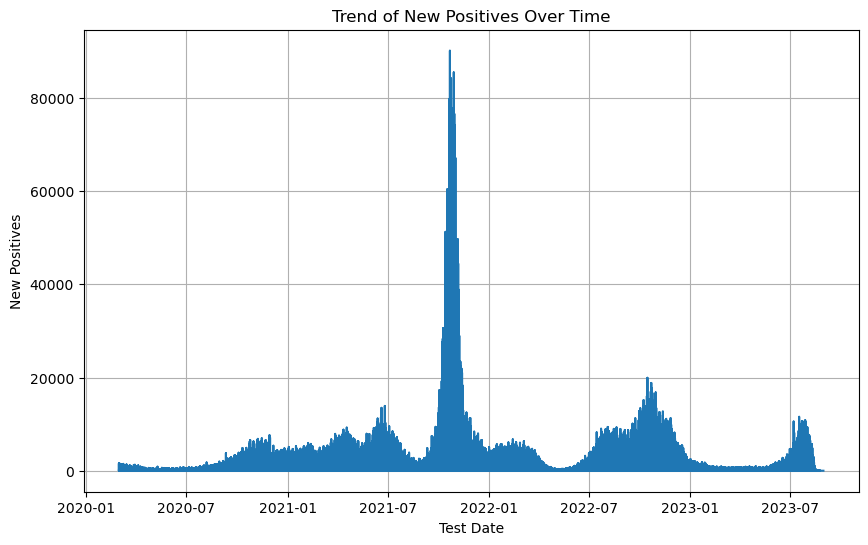

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(dfcovid['Test Date'].sort_values(), dfcovid['New Positives'])
plt.title('Trend of New Positives Over Time')
plt.xlabel('Test Date')
plt.ylabel('New Positives')
plt.grid(True)
plt.show()


top 5 counties with the highest number of New Positives

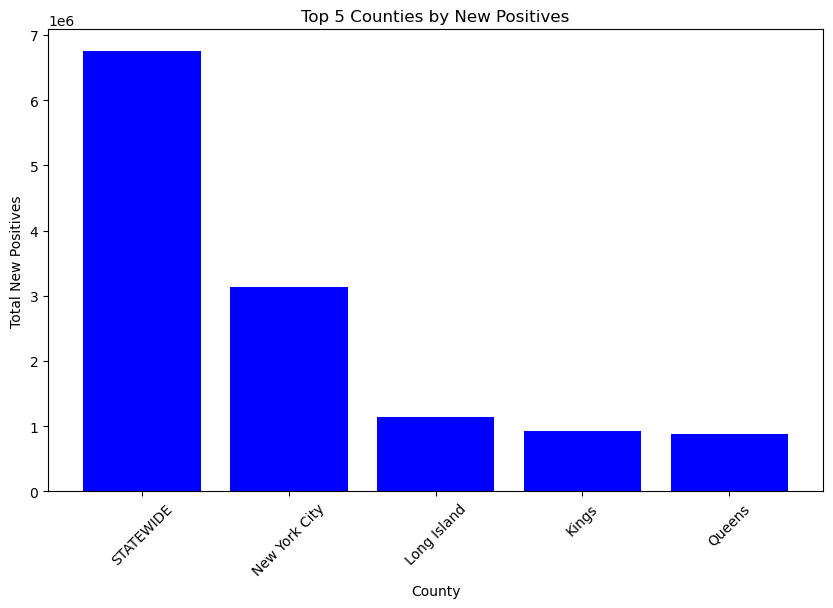

In [49]:
top_counties = dfcovid.groupby('County')['New Positives'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
plt.bar(top_counties.index, top_counties.values, color='blue')
plt.title('Top 5 Counties by New Positives')
plt.xlabel('County')
plt.ylabel('Total New Positives')
plt.xticks(rotation=45)
plt.show()

This pie chart shows the distribution of "New Positives" among the top 5 counties.

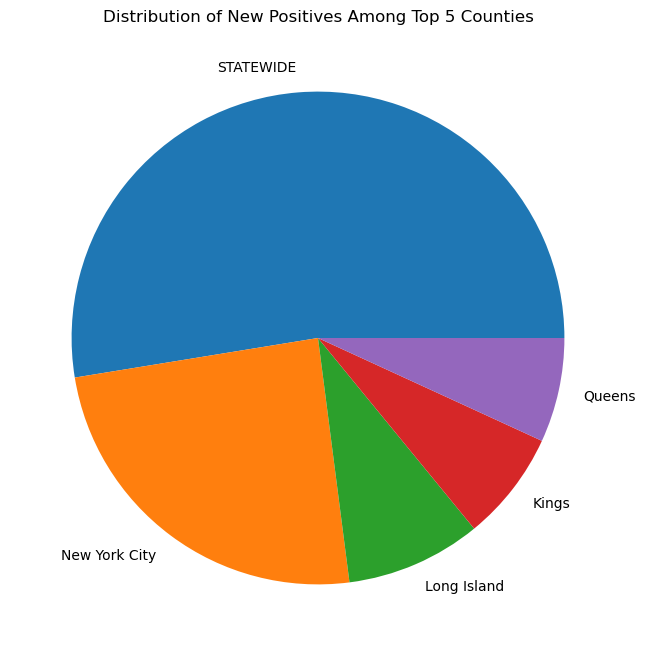

In [51]:
plt.figure(figsize=(8, 8))
plt.pie(top_counties, labels=top_counties.index)
plt.title('Distribution of New Positives Among Top 5 Counties')
plt.show()


the distribution of Total Number of Tests Performed across all entries

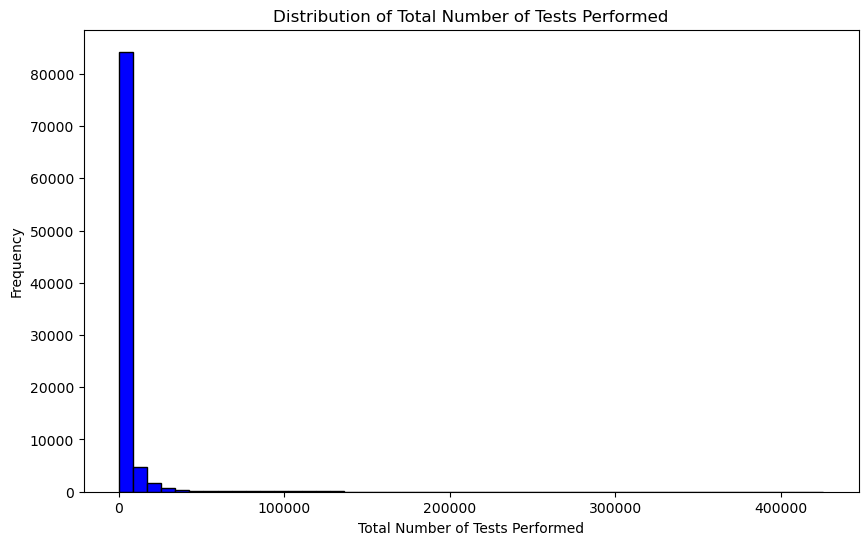

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(dfcovid['Total Number of Tests Performed'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Total Number of Tests Performed')
plt.xlabel('Total Number of Tests Performed')
plt.ylabel('Frequency')
plt.show()

compares the New Positives and Cumulative Number of Positives over time

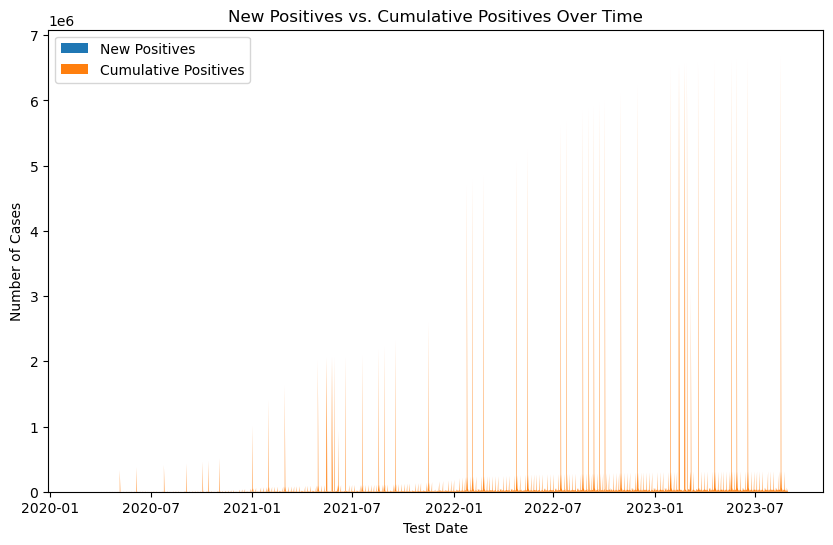

In [58]:
dfcovid_sorted = dfcovid.sort_values('Test Date')
plt.figure(figsize=(10, 6))
plt.stackplot(dfcovid_sorted['Test Date'], dfcovid_sorted['New Positives'], dfcovid_sorted['Cumulative Number of Positives'], labels=['New Positives', 'Cumulative Positives'])
plt.legend(loc='upper left')
plt.title('New Positives vs. Cumulative Positives Over Time')
plt.xlabel('Test Date')
plt.ylabel('Number of Cases')
plt.show()
